# BC_01 Bias Corrected Estimation of Paleointensity

## Author(s)

In [41]:
Author1={"name":"Brendan Cych","affiliation":"Scripps Institution of Oceanography, UCSD","email":"bcych@ucsd.edu","orcid":"0000-0003-2387-3544"}
Author2={"name":"Matthias Morzfeld","affiliation":"Scripps Institution of Oceanography, UCSD","email":"matti@ucsd.edu","orcid":"0000-0003-2257-8930"}
Author3={"name":"Lisa Tauxe","affiliation":"Scripps Institution of Oceanography, UCSD","email":"ltauxe@ucsd.edu","orcid":"0000-0002-4837-8200"}

## Purpose
Bias Corrected Estimation of Paleointensity (BiCEP) is a new method for analyzing Thellier-type paleointensity data. Paleointensities are estjmates of the Earth's ancient magnetic field strength, obtained from materials including rocks and pottery sherds which cooled in that field. Paleointensity can be obtained by comparing the magnetization lost on cooling a specimen in zero field, to the magnetization lost on cooling in a known lab field.

BiCEP differs from other methods of paleointensity analysis, because it reduces the number of experiments that need to be excluded from the analysis. Traditionally, paleomagnetic specimens are excluded from paleointensity analyses because they are assumed to violate the assumptions of the paleointensity experiment. Specimens are normally excluded based on some arbitrary selection criteria, which are empirical descriptions of deviations from the experimental assumptions. BiCEP instead assumes that the paleointensity estimate for each specimen has some amount of bias based on the values of these criteria. In this way we can correct back to the unbiased value of the paleointensity using BiCEP.

BiCEP can be used to analyze new paleointensity data, and to reanalyze old paleointensity data 


## Technical contributions
This notebook
- Uses the BiCEP_functions library to read in, plot and analyze paleointensity data.

- Uses a Markov Chain Monte Carlo (MCMC) sampler using the `pystan` package (http://mc-stan.org) to determine the relationship between the curvature ($\vec{k}$) parameter (Paterson, 2011) for specimens which were magnetized in the same field.

- Allows you to save these data into the MagIC database format (https://www2.earthref.org/MagIC)

- Demonstrates a GUI which allows you to perform the previous steps more easily. 


## Methodology
- Thellier Type Paleointensity data must be imported using the MagIC format. A measurements.txt, specimens.txt, samples.txt and sites.txt are required. These are then saved as an internal csv format for use with BiCEP.

- Paleointensity data can be plotted and some limited analysis using different selection criteria can be performed.

- The BiCEP method can be fit to a collection of specimens, either sample or site, and the results can be plotted. Reanalysis is possible. For more information on the paleointensity method- see the citation for more detailed information on how the method operates.

- The results of the BiCEP method can be saved to MagIC format. 

## Results
The BiCEP method yields a similar number of accurate paleointensity estimates to the looser sets of traditional selection criteria analyzed, but with higher precision and accuracy more akin to tighter sets of criteria which yield fewer estimates. See Figure 7 in Cych et al (in press) for more information.

## Funding

In [2]:
Award1 = {"agency": "National Science Foundation", "award_code": "EAR1547263", "award_URL": "award_URL"}
Award2 = {"agency": "National Science Foundation", "award_code": "EAR1827263", "award_URL": "award_URL"}

## Keywords
Include up to 5 keywords, using the template below.

keywords=["Data Analysis", "Paleomagnetism", "Paleointensity", "Markov Chain Monte Carlo", "Bayesian Statistics"]

## Citation
Cych et al (In Press) doi: 10.1002/essoar.10506403.1 https://www.essoar.org/doi/10.1002/essoar.10506403.1


## Acknowledgements 
We are deeply grateful to Lennart de Groot and Greig Paterson for their very helpful reviews and for the advice and guidance given by Andrew Roberts, David Heslop and Joseph Wilson.

# Setup

## Library import

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Local library import

In [4]:
import sys
sys.path.append('modules_and_scripts/') 
#This compiles the pystan models needed for BiCEP_GUI. This is only required on the first time running the notebook
#import compile_models.py

#The BiCEP_functions library imports all other needed libraries
import BiCEP_functions as BiCEP

# Parameter definitions

In [39]:
B_exp=36.4 #The expected field for the site we will be using BiCEP with today


# Data import

We can produce a data file that BiCEP can read internally from the magic format using the `generate_arai_plot_table` function in BiCEP_GUI. We will specify an output name of `example_data.csv`. For your convenience, we have included a set of MagIC formatted data to convert to the BiCEP format. This may take a few minutes

In [5]:
BiCEP.generate_arai_plot_table('example_data')

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org
Working on: AL2360-1a
Working on: AL2360-1b
Working on: AL2360-1c
Working on: AL2360-1d
Working on: AL2360-1e
Working on: AL2742-4a
Working on: AL2742-4b
Working on: AL2742-4e
Working on: AL2742-4f
Working on: AL2742-4g
Working on: AL2770-3a
Working on: AL2770-3b
Working on: AL2770-3c
Working on: AL2844-2a
Working on: AL2844-2b
Working on: AL2852-2a
Working on: AL2852-2b
Working on: AL2852-2c
Working on: AL2852-2d
Working on: AL2852-2e
Working on: AL2852-2f
Working on: AL3023-1a
Working on: AL3023-1b
Working on: AL3028-2a
Working on: AL3028-2b
Working on: AL3029-4a
Working on: AL3029-4b
Working on: AL3029-4c
Working on: AL3029-5a
Working on: AL3031-1a
Working on: AL3031-1b
Working on: AL3031-1c
Working on: AL3031-1d
Working on: AL3034-2a
Working on: AL3034-2d
Working on: AL3034-2e
Working on: AL3034-5a
Working on: AL3034-5b
Working on: AL3034-5d
Working

Working on: ET1_311E
Working on: ET1_318A
ET1_318A in site ET1 Not included, demagnetization not completed
Working on: ET2_182B
Working on: ET2_185A
ET2_185A in site ET2 Not included, demagnetization not completed
Working on: ET2_187A
ET2_187A in site ET2 Not included, demagnetization not completed
Working on: ET2_192A
ET2_192A in site ET2 Not included, demagnetization not completed
Working on: ET2_196D
Working on: ET3_008A
Working on: ET3_023E2
Working on: ET3_059C
Working on: ET3_064C
Working on: ET3_146A
ET3_146A in site ET3 Not included, demagnetization not completed
Working on: ET3_150B
ET3_150B in site ET3 Not included, demagnetization not completed
Working on: MGH1
Working on: W1
Working on: W2
Working on: W3
Working on: W4
Working on: W5
Working on: W6
Working on: LV10D3A
Working on: LV11A2
Working on: LV12A2A
Working on: LV12D1
Working on: LV12E2
Working on: LV14C3A
Working on: LV15B1
Working on: LV16A2B
Working on: LV16B1B
Working on: LV17A1A
Working on: LV18B3
Working on: LV

When imported, BiCEP data is stored internally as a set of nested objects, one for the dataset which contains a object for each site (a set of samples expected to have been magnetized in the same field), or each sample (an object collected in the field) which are described using a SpecimenCollection object. Each of these SpecimenCollection objects contains an object for each specimen, which is a subsample that a set of independent measurements are made on. To make the data class, we can initialize a `ThellierData` object using our `example_data.csv` file. This may take a few seconds to create all of the objects. Printing our ThellierData object allows us to see the number of sites and specimens.

In [6]:
data=BiCEP.ThellierData('example_data.csv')
print(data)

Set of Thellier Data Containing the Sites:
1991-1992 Eruption Site	(53 specimens)
hw108	(23 specimens)
hw123	(12 specimens)
hw126	(13 specimens)
hw128	(26 specimens)
hw201	(12 specimens)
hw226	(11 specimens)
hw241	(18 specimens)
BR06	(3 specimens)
P	(36 specimens)
VM	(18 specimens)
BBQ	(12 specimens)
rs25	(5 specimens)
rs26	(5 specimens)
rs27	(10 specimens)
remag-rs61	(6 specimens)
remag-rs62	(6 specimens)
remag-rs63	(5 specimens)
remag-rs78	(4 specimens)
kf	(3 specimens)
Hawaii 1960 Flow	(22 specimens)
SW	(19 specimens)
TS	(53 specimens)
ET1	(3 specimens)
ET2	(2 specimens)
ET3	(4 specimens)
Synthetic60	(7 specimens)
LV	(45 specimens)
MSH	(19 specimens)
FreshTRM	(24 specimens)



# Data processing and analysis

### Looking at site and specimen data
We can index for our sites and specimens using a key for the site name. Let's look at site "hw126" and print out the object to see the specimens. This was a lava flow erupted in Hawaii in 1935 and originally analyzed by Cromwell et al (2015). We know that the original field this lava flow was erupted in was approximately 36.4 μT.

In [7]:
site=data['hw126']
print(site)

Site containing the specimens:
hw126a1
hw126a2
hw126a3
hw126a4
hw126a5
hw126b1
hw126b2
hw126b3
hw126b4
hw126b5
hw126a6
hw126a7
hw126a8



Let's take a look at some of these data from one of the specimens from this site. We can use the `plot_arai()` method on our specimen to plot the Thellier data on an Arai plot, which shows the magnitude of the magnetization lost by cooling in zero field against the magnetization gained when cooling in a known field. We can also plot a Zijderveld plot, which plots the magnetization vectors of the zero field steps. In the zijderveld plot, black circles represent the x,y component of the data, whereas red squares represent the x,z component.

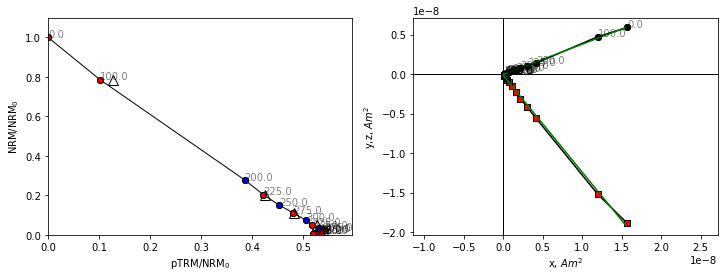

In [8]:
specimen=site['hw126a1']
fig,ax=plt.subplots(1,2,figsize=(12,4))
specimen.plot_arai(ax[0])
specimen.plot_zijd(ax[1])

Both our Arai plot and Zijderveld plot are a straight line. Because we're plotting magnetization lost in zero field, against magnetization gained in a known field, the ratio of our two lines is the ratio of the Ancient field to the Lab field which is a little under 2. We can check the lab field using the `B_lab` attribute of the specimen.

In [9]:
specimen.B_lab

20.0

The lab field was 20 μT. If we expect a value of 36.4 μT, then a slope of slightly under 2 is what we might expect. Let's look at another specimen.

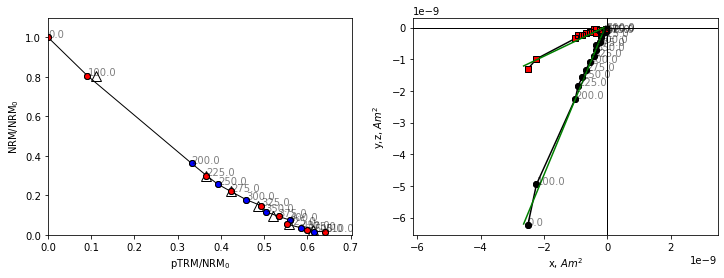

In [10]:
specimen=site['hw126a2']
fig,ax=plt.subplots(1,2,figsize=(12,4))
specimen.plot_arai(ax[0])
specimen.plot_zijd(ax[1])

The data for this specimen do not follow a straight line. Although the line slope appears to start out at a reasonable value, it quickly becomes shallower at higher temperatures. If we were to fit a line to these data we might end up with an underestimate of the paleointensity, and there is no reason to suggest which temperature range to pick for our intensity data. Some strict selection criteria might exclude this specimen, others might include it, but could include an incorrect temperature range, which could give a biased paleointensity estimate.

### The BiCEP method- accounting for Bias

BiCEP works differently. It fits a circle to a scaled set of paleointensity data and uses the tangent joining the circle center and the origin. BiCEP generates many circle fits from a probability distribution. Let's look at the circle fits that BiCEP samples from the posterior distribution, and the median tangent which we use to fit the line. BiCEP fits are performed at a site level for a reason which will become apparent later. We can use the method `site.BiCEP_fit()` to fit the BiCEP method (this may take several minutes depending on the speed of your processor and memory available) and plot the circle and tangent fits to the data.

In [11]:
#There is also a model_circle_slow which fits these circles using a slower model,
#use this if you are having problems with sampling.
site.BiCEP_fit(model=BiCEP.model_circle_fast)
#This cell may generate warnings from the internal pystan code. 
#The main error to watch for is one about R_hat, which indicates the sampler hasn't converged, a "bad" run

We can use the `specimen.plot_circ()` method to draw a circle under the Arai plot data

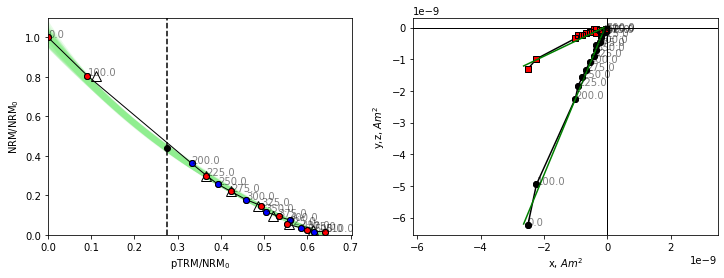

In [13]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
specimen.plot_circ(ax[0],tangent=True)
specimen.plot_arai(ax[0])
specimen.plot_zijd(ax[1])

We notice that this tangent is slightly less than the initial slope, how does this help us? BiCEP assumes that the curvature, $\vec{k}$ (1/radius with sign depending on direction of curvature, Paterson, 2011) of the fit circle is proportional to the calculated ancient field ($B_{anc}$). For $\vec{k}=0$, our answer becomes a perfect line. BiCEP tries to fit a linear relationship between $B_{anc}$ and $\vec{k}$ for all specimens in a site. The value of the field at $\vec{k}$=0 gives us our estimate of the ancient field. We can plot this relationship using the method `site.regplot()`. We plot the expected field value as a red line.

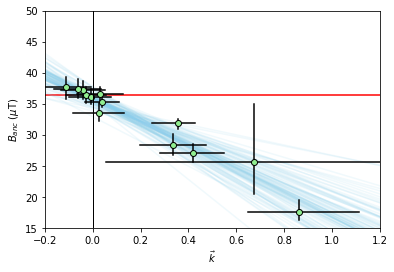

In [14]:
fig,ax=plt.subplots()
site.regplot(ax)

#x limits, y limits and y label are not set by this method as it is used slightly differently in our GUI.

ax.set_xlim(-0.2,1.2)
ax.set_ylim(15,50);
ax.set_ylabel('$B_{anc}$ ($\mu$T)')
ax.axhline(36.4,color='r',zorder=0);

The green values are our individual specimen estimates for $\vec{k}$ and $B_{anc}$ and their 95% confidence intervals. The blue lines are our BiCEP fits to these data. Notice that these lines cross the $\vec{k}=0$ line close to the expected field value, yielding an accurate and precise estimate of the paleointensity, without excluding any specimens! We can get a sense of the distribution of estimates for $B_{anc}$ using the `site.histplot()` method.

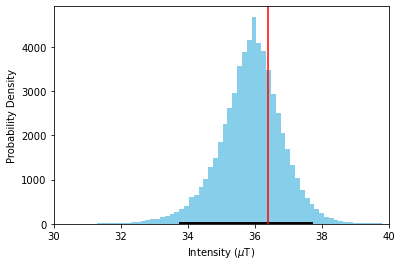

In [19]:
fig,ax=plt.subplots()
site.histplot(ax)

ax.set_xlim(30,40)
ax.axvline(36.4,color='r');

We can see that our estimate for $B_{anc}$ is close to the median value of this distribution, and well within the 95% confidence interval denoted by the black line. Our estimate is accurate and precise, with a 95% confidence interval of ~4 μT

### Data manipulation, and choosing interpretations.

You might notice that some of our specimens have larger error bars on their $\vec{k}$ estimates than others in our BiCEP fitting figure. Let's investigate what's going on with these specimens.

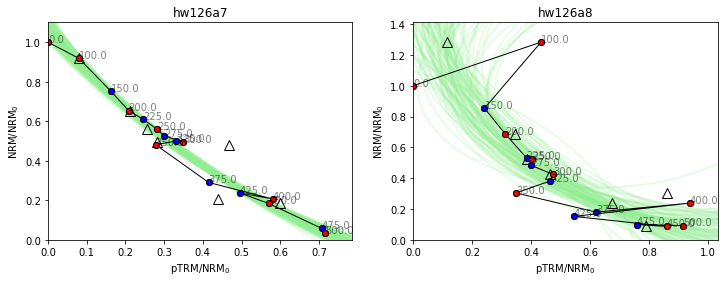

In [26]:
fig,ax=plt.subplots(1,2,figsize=(12,4));
hw126a7=site['hw126a7']
hw126a8=site['hw126a8']
hw126a7.plot_circ(ax[0])
hw126a7.plot_arai(ax[0])
ax[0].set_title('hw126a7')

hw126a8.plot_circ(ax[1])
hw126a8.plot_arai(ax[1])
ax[1].set_title('hw126a8');

For these specimens, our analysis might be slightly different. Our specimen "hw126a7" has a pTRM check (triangle) which is very displaced from the line at the 300 °C temperature step. This is a repeat of the 300 °C in-field measurement after heating to 350 °C in zero field. It indicates a chemical alteration of the specimen between 300 °C and 350 °C. We can use this by calculating the DRAT statistic of , using the attribute `specimen.drat`, and noticing that it is high (criteria vary, but 15 is considered a high value by any metric). Although we have already demonstrated the effectiveness of BiCEP without using this statistic, we have an independent reason to only use the temperatures up until 300 °C. We can do this using the method `specimen.change_temps()`, and we save this change using the method `specimen.save_changes()`.

Our specimen "hw126a8" has a very early failed pTRM check, and fitting a circle seems like it would probably be inappropriate. We can elect to exclude this specimen as no part of the line is likely to give a good paleointensity estimate. This can be done by setting the attribute `specimen.active=False` Ultimately, due to its large uncertainty in the circle fit, it has very little effect on the estimate of $B_{anc}$ in the first place.

In [45]:
#Printing the DRAT parameter of the specimen to 
print('hw126a7 DRAT: %2.1f'%hw126a7.drat)
print('hw126a8 DRAT: %2.1f'%hw126a8.drat)

lowerTemp=0
upperTemp=300
lowerTempK,upperTempK=lowerTemp+273,upperTemp+273

hw126a7.change_temps(lowerTempK,upperTempK)
hw126a7.save_changes()
hw126a8.active=False

hw126a7 DRAT: 4.2
hw126a8 DRAT: 38.4


We now run the BiCEP method again with these changes in place, and plot up our site results with the results for these two specimens.

In [36]:
site.BiCEP_fit(model=BiCEP.model_circle_fast)

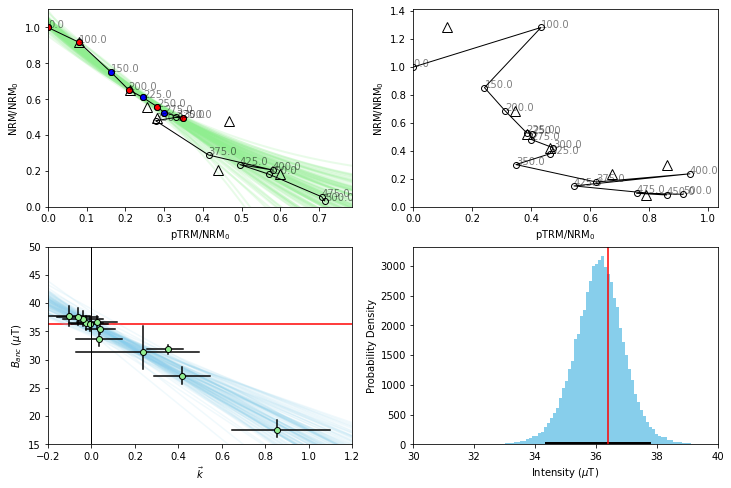

In [38]:
#set up subplots
fig,ax=plt.subplots(2,2,figsize=(12,8))

#Plot our Arai plots with circle fits
hw126a7.plot_circ(ax[0,0])
hw126a7.plot_arai(ax[0,0])

hw126a8.plot_circ(ax[0,1])
hw126a8.plot_arai(ax[0,1])


#Plot our plot of the BiCEP fit.
site.regplot(ax[1,0])
ax[1,0].set_xlim(-0.2,1.2)
ax[1,0].set_ylim(15,50);
ax[1,0].set_ylabel('$B_{anc}$ ($\mu$T)')
ax[1,0].axhline(36.4,color='r',zorder=0);


#Plot our histogram
site.histplot(ax[1,1])
ax[1,1].set_xlim(30,40)
ax[1,1].axvline(36.4,color='r');

We notice from our histogram that doing this data manipulation has very slightly improved our accuracy and precision- but the overall distribution has not changed vary much. We notice from our Arai plot for specimen hw126a7 that the uncertainty in our circle fits has become much larger by excluding these temperature steps. This is because we assume the uncertainty in the circle fit for the whole Arai plot, rather than just the segment we're looking at. In this way, we are penalized for excluding data from the Arai plot, without having to use some kind of "length of the line" criterion. 

### Saving data to MagIC format.

Once we have run our site- we can save our results directly into the MagIC formatted data file. This will save results of the BiCEP method for our site and all specimens in that site. We can do this using the method
`site.save_magic_tables()`

In [46]:
site.save_magic_tables()

30  records written to file  sites.txt
566  records written to file  specimens.txt


### GUI
As we think that using these functions for every site will be cumbersome, we present a GUI which performs all of these steps. The GUI can save figures produced, and also produces diagnostics about the sampler, as well as important diagnostic information about the sampler. We can use the `run_gui()` function to initialize the GUI. Note that the `%matplotlib widget` magic command is required to have the BiCEP GUI display plots correctly. Above figures can be set to the normal plotting style when rerunning cells using the `%matplotlib inline` magic command. 

In [59]:
%matplotlib widget
BiCEP.run_gui();

### GUI Documentation

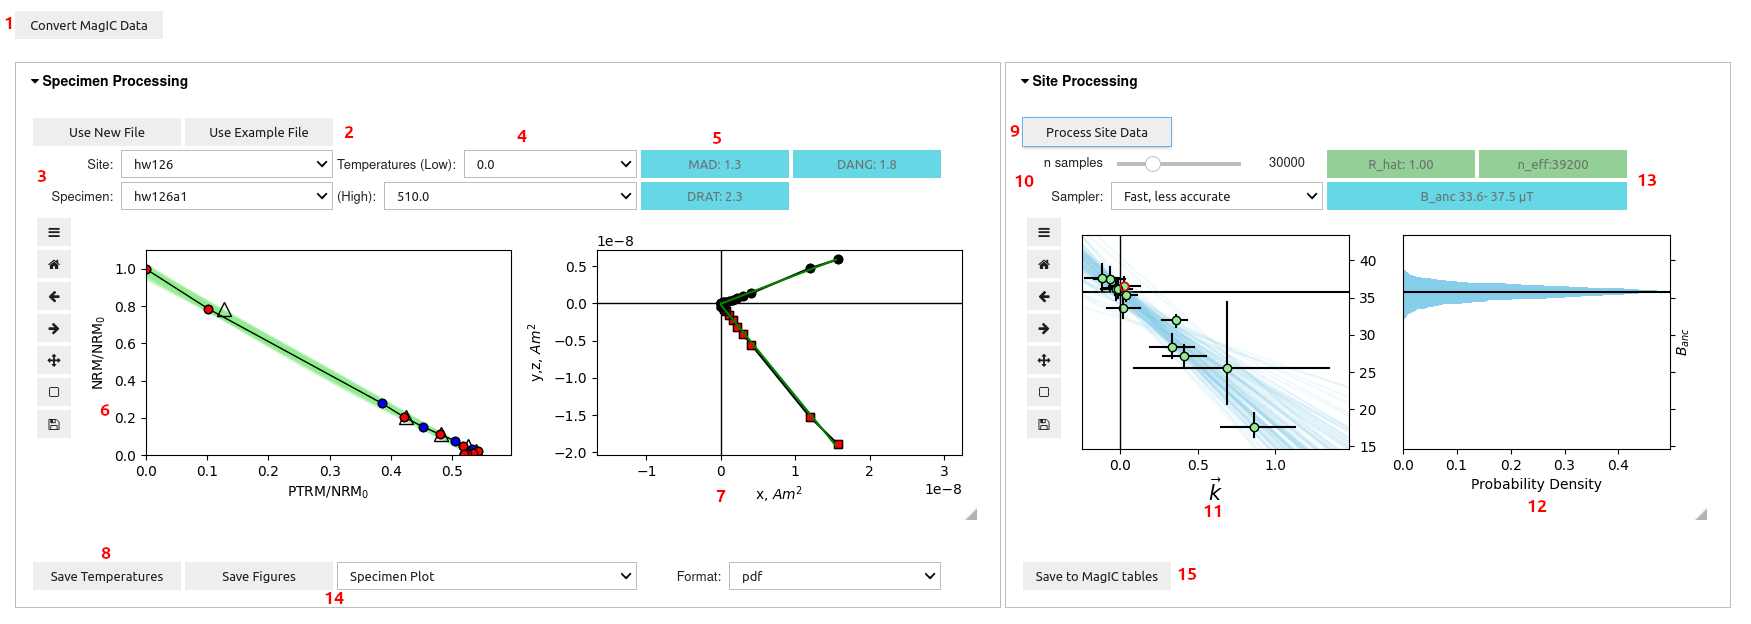

In [58]:
Image('readme_image/GUI_layout.png')

# References
List relevant references:
